# Missing Values in Datasets

## Overview

Missing values occur in datasets when some information is not stored for a variable. Understanding the mechanism behind missing data is crucial for proper handling and analysis.

## Three Missing Data Mechanisms

### 1. Missing Completely at Random (MCAR)

**Definition:** The probability of a value being missing is unrelated to both the observed data and the missing data itself.

**Characteristics:**
- Missing values are randomly distributed throughout the dataset
- No systematic reason for missingness
- The absence of data provides no information about the missing values

**Example:**
In a disease prevalence survey, if survey participants with missing values for certain questions were selected randomly, and their missing responses are unrelated to their disease status or any other measured variables, the data is MCAR.

**Data Science Implication:**
- Least problematic for analysis
- Simple methods like listwise deletion are relatively safe
- Standard imputation methods produce unbiased estimates

### 2. Missing at Random (MAR)

**Definition:** The probability of a value being missing depends only on the observed data, but not on the missing data itself.

**Characteristics:**
- Missing values are systematically related to observed variables
- The missingness can be explained by other observed variables
- Not dependent on the unobserved values themselves

**Examples:**

- **Income Data:** Survey participants' decision to report income is related to their age or gender, but not to their actual income level
- **Medical Data:** Patients are more likely to report blood pressure if they are younger or have healthier lifestyles, but the missingness is independent of their actual blood pressure values

**Data Science Implication:**
- Moderate complexity for handling
- Requires more sophisticated methods like multiple imputation or maximum likelihood estimation
- Simple deletion can introduce bias
- Conditional on observed variables, missingness is random

### 3. Missing Not at Random (MNAR)

**Definition:** The probability of missing values depends on the value of the missing data itself. The missingness is dependent on unobserved or unmeasured factors.

**Characteristics:**
- Missingness is not random and cannot be explained by observed data alone
- Related to unobserved variables or the missing values themselves
- Most problematic type of missing data

**Example:**
When collecting income and job satisfaction data from employees, dissatisfied employees are more likely to refuse reporting their income. Here, missingness depends on job satisfaction (an unobserved determinant of the decision), making it MNAR.

**Data Science Implication:**
- Most challenging to handle
- Cannot be resolved with observed data alone
- Requires domain expertise and sensitivity analysis
- Simple imputation methods can produce highly biased results
- May need to make untestable assumptions about the missing data mechanism

## Key Takeaways for Data Scientists

| Mechanism | Depends On | Severity | Solution Complexity |
|-----------|-----------|----------|-------------------|
| MCAR | Neither observed nor missing data | Low | Simple (deletion, basic imputation) |
| MAR | Observed data only | Moderate | Intermediate (multiple imputation, ML) |
| MNAR | Missing data itself | High | Complex (sensitivity analysis, domain knowledge) |

**Critical Point:** Always investigate the mechanism behind missing data before choosing an imputation or deletion strategy, as the validity of your analysis depends on it.

## Example Scenarios

In [2]:
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
324,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
647,1,1,male,56.0,0,0,35.5000,C,First,man,True,A,Cherbourg,yes,True
816,0,3,female,23.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,no,True
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
754,1,2,female,48.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
577,1,1,female,39.0,1,0,55.9000,S,First,woman,False,E,Southampton,yes,False
180,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
547,1,2,male,NaN,0,0,13.8625,C,Second,man,True,NaN,Cherbourg,yes,True


## **Checking Missing Values**

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### **Method 1** 

#### Remove Rows with Missing Values

- If the dataset is large and the number of rows with missing values is small, removing those rows can be a simple solution.
- However, this approach can lead to loss of valuable information if the missing data is not MCAR.
- It is essential to assess the impact of removing rows on the overall dataset.
- This method is generally not recommended for MAR or MNAR data, as it can introduce bias.

In [7]:
df.shape

(891, 15)

In [11]:
df.dropna(inplace=False).shape

(182, 15)

So , its not a good idea to remove rows since if do so we will loose a lot of data (891 -> 182) . Hence we will try other methods to handle missing values.

####  Remove Columns with Missing Values 

In [12]:
df.shape

(891, 15)

In [13]:
df.dropna(axis=1).shape     # use inplace=True to make changes in original dataframe

(891, 11)

This method can be considered when a column has a high percentage of missing values and is not critical for analysis. However, it can lead to loss of potentially valuable information if the column is important for the analysis.

### **Method 2**  : Imputation Techniques 

####  Mean value imputation

It involves replacing missing values with the mean of the observed values for that variable. This method is simple and easy to implement .

- but it can lead to underestimation of variability and may not be suitable for skewed distributions.
- It works well for a normally distributed Data with missing values.

<Axes: xlabel='age', ylabel='Count'>

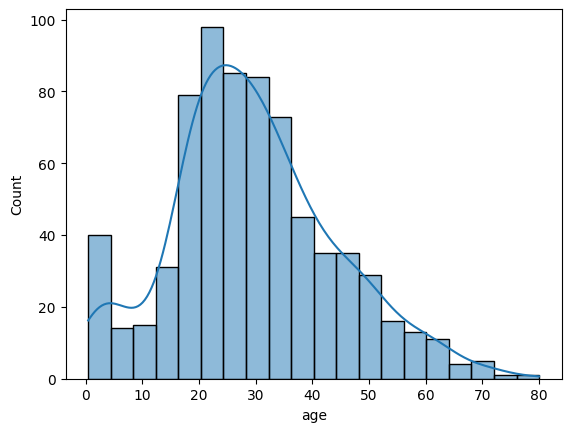

In [14]:
sns.histplot(data=df, x='age', kde=True)

In [15]:
df['Age_Mean_Imputed'] = df['age'].fillna(df['age'].mean())

In [22]:
print("Number of missing values after Mean Imputation: " , df['Age_Mean_Imputed'].isnull().sum(),"\n")
df.isnull().sum()

Number of missing values after Mean Imputation:  0 



survived              0
pclass                0
sex                   0
age                 177
sibsp                 0
parch                 0
fare                  0
embarked              2
class                 0
who                   0
adult_male            0
deck                688
embark_town           2
alive                 0
alone                 0
Age_Mean_Imputed      0
dtype: int64

####  Median value imputation

It involves replacing missing values with the median of the observed values for that variable. This method is robust to outliers and skewed distributions.

- It is particularly useful when the data is not normally distributed.
- or when we have outliers in the data. 

In [24]:
df['Age_Median_Imputed'] = df['age'].fillna(df['age'].median())

In [28]:
df['Age_Median_Imputed'].isnull().sum()
df[['Age_Mean_Imputed','Age_Median_Imputed' , 'age']]

,Age_Mean_Imputed,Age_Median_Imputed,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


####  Mode value imputation

It involves replacing missing values with the mode (most frequently occurring value) of the observed values for that variable. 

- This method is suitable for categorical variables.
- It is less affected by outliers compared to mean imputation.

In [29]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean_Imputed,Age_Median_Imputed
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [30]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [40]:
df['embarked_Mode_Imputed'] = df['embarked'].fillna(mode_value) 

In [43]:
df[['embarked', 'embarked_Mode_Imputed']].isnull().sum()

embarked                 2
embarked_Mode_Imputed    0
dtype: int64